### Author : Sanjoy Biswas
### Project : Website Url Feature Data Classification & Data Visualization
### Email : sanjoy.eee32@gmail.com

Hello Kagglers,
Here is the solution of Website Url base Data Feature Classification and Data Visualization.
* For Visualization I Use matplotlib & Seaborn Library
* Use Sklearn library for data scaling & Matrix form
* Use Naive bayes & SVM Algorithm
* Use Deep Learning Library Keras & Tensorflow backend
* Use NLP For sentiment Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

Using TensorFlow backend.


### Load Website Feature DataSet 

In [2]:
names=['URL','Category']
df=pd.read_csv('../input/website-classification-using-url/URL Classification.csv',names=names, na_filter=False)
dataset = df[:]

### Website Feature Information

In [3]:

adult = dataset[1:2000]
arts = dataset[50000:52000]
business = dataset[520000:522000]
computers = dataset[535300:537300]
games = dataset[650000:652000]
health = dataset[710000:712000]
home =  dataset[764200:766200]
kids =  dataset[793080:795080]
news =  dataset[839730:841730]
recreation =  dataset[850000:852000]
reference =  dataset[955250:957250]
science =  dataset[1013000:1015000]
shopping =  dataset[1143000:1145000]
society =  dataset[1293000:1295000]
sports =  dataset[1492000:1494000]

test_data = pd.concat([adult, arts, business, computers, games, health, home, 
              kids, news, recreation, reference,science, shopping, society, sports], axis=0)

dataset.drop(dataset.index[1:2000],inplace= True)
dataset.drop(dataset.index[50000:52000],inplace= True)
dataset.drop(dataset.index[520000:522000],inplace= True)
dataset.drop(dataset.index[535300:537300],inplace= True)
dataset.drop(dataset.index[650000:652000],inplace= True)
dataset.drop(dataset.index[710000:712000],inplace= True)
dataset.drop(dataset.index[764200:766200],inplace= True)
dataset.drop(dataset.index[793080:795080],inplace= True)
dataset.drop(dataset.index[839730:841730],inplace= True)
dataset.drop(dataset.index[850000:852000],inplace= True)
dataset.drop(dataset.index[955250:957250],inplace= True)
dataset.drop(dataset.index[1013000:1015000],inplace= True)
dataset.drop(dataset.index[1143000:1145000],inplace= True)
dataset.drop(dataset.index[1293000:1295000],inplace= True)
dataset.drop(dataset.index[1492000:1494000],inplace= True)
dataset.tail()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,URL,Category
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562978,http://www.usatoday.com/sports/preps/,Sports


### Total Individual Category Data Visualization

Text(0, 0.5, 'Total Number Of Individual Category')

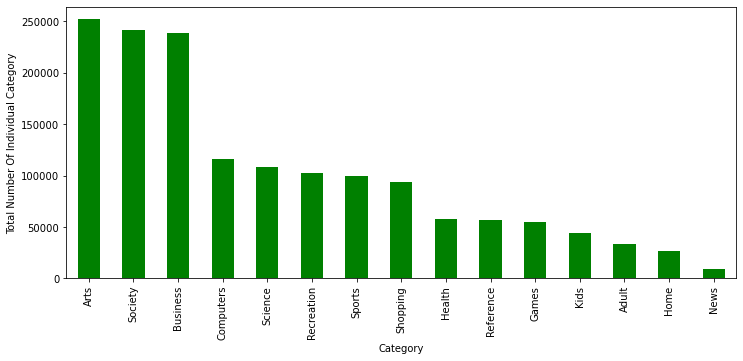

In [4]:
dataset.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

,URL,Category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult


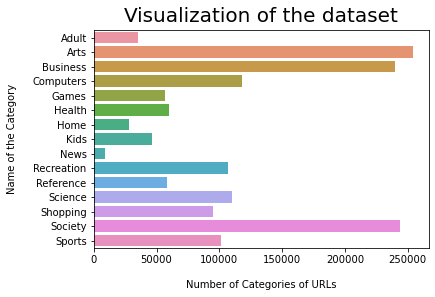

In [5]:
import seaborn as sns
ax = sns.countplot(y="Category",  data=df )
plt.title("Visualization of the dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)
df[:2]

Text(0.5, 0, 'Number of Categories of URLs')

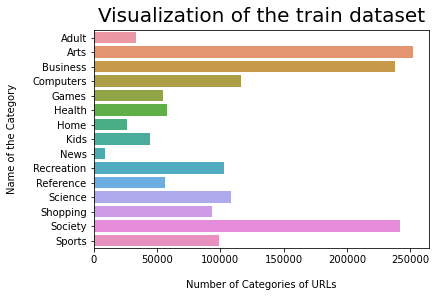

In [6]:
ax = sns.countplot(y = "Category",  data = dataset )
plt.title("Visualization of the train dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

Text(0, 0.5, 'Total Number Of Individual Category')

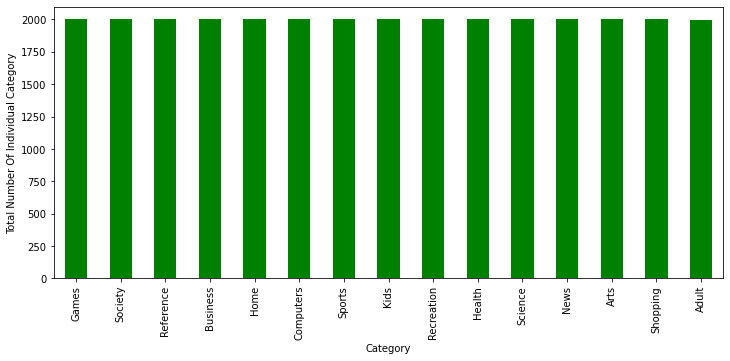

In [7]:
test_data.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

Text(0.5, 0, 'Number of Categories of URLs')

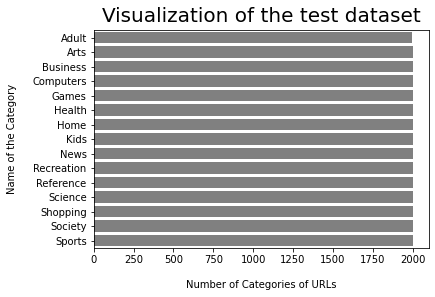

In [8]:
ax = sns.countplot(y = "Category",  data = test_data , color = 'gray')
plt.title("Visualization of the test dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

In [9]:
X_train=dataset['URL']
y_train=dataset['Category']
#print(X_train)
X_train.shape

(1532979,)

In [10]:
X_test=test_data['URL']
y_test=test_data['Category']
#print(X_test)
X_test.shape

(29999,)

In [11]:
#from sklearn.pipeline import Pipeline
#from sklearn.linear_model import SGDClassifier
#text_clf = Pipeline([
#                   ('vect', CountVectorizer( ngram_range = (2,2))),
#                    ('tfidf', TfidfTransformer()),
#                    ('clf', SGDClassifier(loss='perceptron', penalty='l2',
#                     alpha =1e-3 , max_iter=20 ,tol=None)),
#                    ])
#gs_clf = text_clf.fit(X_train , y_train)

### Analysis Website Sentiment Using Natural Language Processing

In [12]:
import re
from sklearn.pipeline import Pipeline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english', ngram_range=(3,3))

#count_vect = CountVectorizer(stop_words='english', ngram_range=(1,1))
gs_clf = Pipeline([('vect', stemmed_count_vect),
                   ('tfidf', TfidfTransformer()),
                   ('clf', SGDClassifier(loss='perceptron', penalty='l2',
                    alpha =1e-4 , max_iter=20 ,tol=None)),
   ])
gs_clf = gs_clf.fit(X_train, y_train)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9145450939582773, 0.9051635054501816, 0.890482243111429, None)

In [14]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

       Adult     0.8513    0.1661    0.2779      1999
        Arts     0.7915    0.9565    0.8662      2000
    Business     0.9512    0.9940    0.9721      2000
   Computers     0.9133    0.9800    0.9455      2000
       Games     0.9758    0.9890    0.9824      2000
      Health     0.9885    0.9925    0.9905      2000
        Home     0.9872    0.9620    0.9744      2000
        Kids     0.9585    0.8090    0.8774      2000
        News     0.8924    0.8295    0.8598      2000
  Recreation     0.9836    0.9875    0.9855      2000
   Reference     0.9100    0.9610    0.9348      2000
     Science     0.9814    0.9785    0.9800      2000
    Shopping     0.9885    0.9865    0.9875      2000
     Society     0.6344    0.9985    0.7758      2000
      Sports     0.9105    0.9865    0.9470      2000

    accuracy                         0.9052     29999
   macro avg     0.9145    0.9051    0.8905     29999
weighted avg     0.9145   

### Site Core Data Visualization Using Features Accuracy

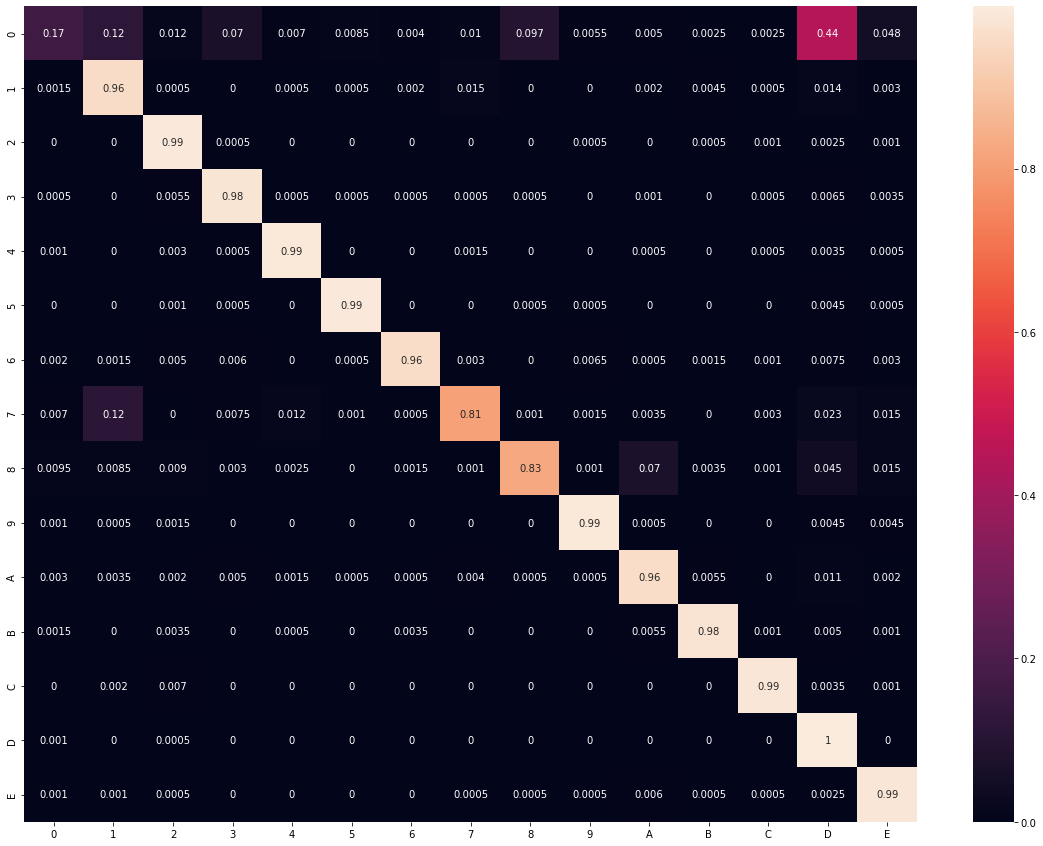

In [15]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

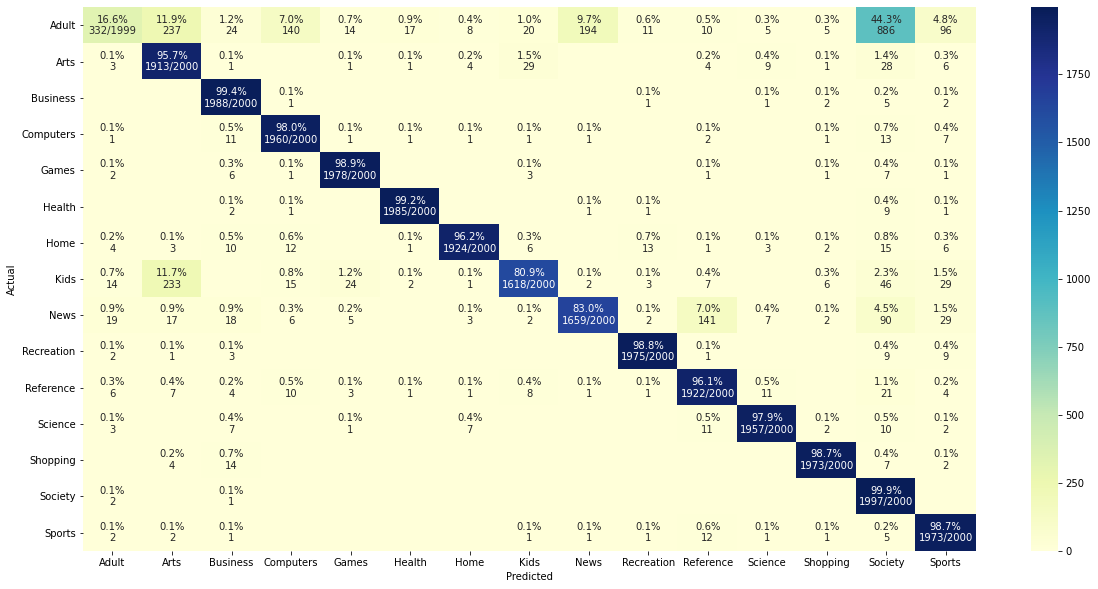

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(20,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

plot_cm(y_test, y_pred)

### Use Naive Base Classifier & SVM Algorithm

In [17]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9758665969983933
Naive Bayes Test Accuracy =  0.9051635054501816


In [18]:
print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict(['http://www.gamespot.net/']))

['Business']
['Games']


### Accuracy Output- 93%

In [19]:
import tensorflow as tf
import pickle

# save the model to disk
filename = 'svm_stem(3,3).sav'
pickle.dump(gs_clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.9051635054501816